<div class="markdown-google-sans">

# **Collect 125K C4_200M Dataset for Grammar Evaluation 🤗**

Collect 125K C4_200M Dataset for Grammar Evaluation with Grammar Error Correction.

</div>


<div class="markdown-google-sans">

## **Information 😲**
</div>

**Title:** Collect 125K C4_200M Dataset for Grammar Evaluation<br>
**Description:** Collect 125K C4_200M Dataset for Grammar Evaluation with Grammar Error Correction<br>
**Code Writer:** Hafid Ikhsan Arifin<br>
**Date created:** 2023/07/18<br>
**Last modified:** 2023/07/18 (7:10 PM)<br> <!-- Edit Here -->
**Version:** 1.0.0<br> <!-- Edit Here -->

**Notebook:**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mFYe3sVA0vtNC4vOqEatzZR0_YPoM5A-?usp=sharing)
[![GitHub watchers](https://img.shields.io/github/watchers/Naereen/StrapDown.js.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/IELTSSpeakingApplication/MachineLearning)

**Dataset:**

[![Open in Spaces](https://huggingface.co/datasets/huggingface/badges/raw/main/open-in-hf-spaces-sm.svg)](https://huggingface.co/hafidikhsan)



<div class="markdown-google-sans">

## **Introduction 🤔**
</div>

[C4_200M](https://github.com/google-research-datasets/C4_200M-synthetic-dataset-for-grammatical-error-correction) is a collection of 185 million sentence pairs generated from the cleaned English dataset from C4. This dataset can be used in grammatical error correction (GEC) tasks. The corruption edits and scripts used to synthesize this dataset is referenced from: [C4_200M Synthetic Dataset](https://github.com/google-research-datasets/C4_200M-synthetic-dataset-for-grammatical-error-correction).

As discussed before, this dataset contains 185 million sentence pairs. Each article has these two attributes: input and output. Here is a sample of dataset:
``` bash
{
  "input": "Bitcoin is for $7,094 this morning, which CoinDesk says."
  "output": "Bitcoin goes for $7,094 this morning, according to CoinDesk."
}
```

Original dataset now available in [Hugging Face Hub Datasets](https://huggingface.co/datasets/liweili/c4_200m).

Because the amount of data is quite large, I will use cut version of this dataset. Thank to [leslyarun](https://huggingface.co/leslyarun) who have created the cut version of [C4_200M](https://huggingface.co/datasets/leslyarun/c4_200m_gec_train100k_test25k) dataset which consists of 100K of training data and 25K of testing data.

In this note book I will collect dataset from [leslyarun/c4_200m_gec_train100k_test25k](https://huggingface.co/datasets/leslyarun/c4_200m_gec_train100k_test25k) dataset, and visualize some dataset information. The following are the steps that I will take to create the dataset.

1.   Load original dataset
2.   Display dataset
3.   Count word in dataset
4.   Visualize dataset
5.   Push dataset to Hugging Face Hub

This dataset will be available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).

Let's code 😋

<div class="markdown-google-sans">

## **Preparation 🧐**
</div>

The first step I will do is install required library. Thank to [leslyarun](https://huggingface.co/leslyarun) who have created the cut version of [C4_200M](https://huggingface.co/datasets/leslyarun/c4_200m_gec_train100k_test25k) dataset which consists of 100K of training data and 25K of testing data. To use this dataset, first I must install [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [1]:
# Install required library
%%capture
!pip install datasets

In [2]:
#@title Check installed library
import datasets

try:
    datasets_version = datasets.__version__
    print("Libraries installed")
except:
    print("Libraries not installed")

Libraries installed


Next, I will import required libraries.

In [3]:
# Import library
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from huggingface_hub import notebook_login
from datasets import load_dataset, Dataset, DatasetDict

Next, I will import drive folder in my colab to save fine tuning result.

In [4]:
# Drive Access
drive.mount("/content/drive")

Mounted at /content/drive


To make the process easier, I will define some global parameters for creating dataset.

In [5]:
# Global parameters
HUGGING_FACE_DATASET = "leslyarun/c4_200m_gec_train100k_test25k"

TRAIN_DATASET = "train"
TEST_DATASET = "test"
INPUT = "input"
OUTPUT = "output"
LEN_INPUT = "length_input"
LEN_OUTPUT = "length_output"

COLAB_BASE_PATH = "/content/"
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Grammar/Dataset/Final'''

PNG = ".png"

BOXPLOT_TRAIN = '"Boxplot Training Dataset"'
BOXPLOT_TEST = '"Boxplot Testing Dataset"'

TARGET_HUGGING_FACE_DATASET_NAME = "c4_200m-gec-train100k-test25k"
PRIVATE = True

In [6]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

<div class="markdown-google-sans">

## **Preprocessing 🤯**
</div>

First thing I do before create dataset is load the original dataset from [Hugging Face Hub Datasets](https://huggingface.co/datasets/leslyarun/c4_200m_gec_train100k_test25k). To load dataset I use [`load_dataset`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/loading_methods#datasets.load_dataset) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [7]:
# Load dataset
dataset = load_dataset(HUGGING_FACE_DATASET)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/leslyarun___csv/leslyarun--c4_200m_gec_train100k_test25k-a569f1648d115e0f/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
# Display dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['input', 'output'],
        num_rows: 25000
    })
})

For ease of preprocessing dataset, I will convert from dataset to dataframe.

In [9]:
# Datasets train to pandas
df_train = dataset[TRAIN_DATASET].to_pandas()
df_train.head()

,input,output
0,"Bitcoin is for $7,094 this morning, which CoinDesk says.","Bitcoin goes for $7,094 this morning, according to CoinDesk."
1,The effect of widespread dud targets two face up attack position monsters on the field.,"1. The effect of ""widespread dud"" targets two face up attack position monsters on the field."
2,"tax on sales of stores for non residents are set at 21% for 2014 and 20% in 2015 payable on sales tentatively earned from the difference of the property value some time of purchase (price differences according to working time) and theyear to which sale couples (sales costs), based on the approved annual on the base approved by law).","Capital Gains tax on the sale of properties for non-residents is set at 21% for 2014 and 20% in 2015 payable on profits earned on the difference of the property value between the year of purchase (purchase price plus costs) and the year of sale (sales price minus costs), based on the approved annual percentage increase on the base value approved by law."
3,Much many brands and sellers still in the market.,Many brands and sellers still in the market.
4,this is is the latest Maintenance release of Samba 3.6,This is is the latest maintenance release of Samba 3.6.


In [10]:
# Datasets test to pandas
df_test = dataset[TEST_DATASET].to_pandas()
df_test.head()

,input,output
0,Organizational mission of Kiss The Ground is inspire global participation in the restoration of our soil precious goods.,The organizational mission of Kiss the Ground is to inspire global participation in the restoration of our precious soils.
1,"Tap The Thumbnail Bellow to See Related Gallery of Elegant Window Treatments Elegant Window Treatment ideas design For Elegant Window Treatments decorator ""","Tap The Thumbnail Bellow to See Related Gallery of ""Elegant Window Treatments Elegant Window Treatment Ideas Design For Elegant Window Treatments Decor"""
2,"when I relax that’s when I shake or jolt to me, like the more I relax the more I do if I focus my mind on anything it does’t happened much.","if I relax that’s when I shake or jolt, like the more I relax the more I do if I focus my mind on something it don’t happen much."
3,"Our neighbor Jay-dub (nickname courtesy of me since he remarked last week that all my kids have numerous nickname and only ever call him's Jake) he can claim ownership of our flock since the kids gives him a chick of them, Patty (aka Kevin).","Our neighbor Jay-dub (nickname courtesy me since he remarked last week that all my kids have numerous nicknames and we only ever call him Jake). He can claim ownership of our flock since the kids gave him a chick of his own, Patty (aka Kevin)."
4,"Kummrow Automotive is now a Official Distributor Dinan offers a line of high performance products, upgrades and services to enhance your BMW or MINI.","Kummrow Automotive is now an official Dinan Distributor offering a line of high performance products, upgrades and services to enhance your BMW or MINI."


Next step is calculate the len of word in dataset. To do this, first is define function to calculate word in a sentence.

In [11]:
# Define function to count word
def word_count_func(text):
    return len(text.split())

Next, mapping the function to dataset.

In [12]:
# Mapping to input column train dataset
df_train[LEN_INPUT]= df_train[INPUT].apply(lambda x:word_count_func(x))
df_train.head()

,input,output,length_input
0,"Bitcoin is for $7,094 this morning, which CoinDesk says.","Bitcoin goes for $7,094 this morning, according to CoinDesk.",9
1,The effect of widespread dud targets two face up attack position monsters on the field.,"1. The effect of ""widespread dud"" targets two face up attack position monsters on the field.",15
2,"tax on sales of stores for non residents are set at 21% for 2014 and 20% in 2015 payable on sales tentatively earned from the difference of the property value some time of purchase (price differences according to working time) and theyear to which sale couples (sales costs), based on the approved annual on the base approved by law).","Capital Gains tax on the sale of properties for non-residents is set at 21% for 2014 and 20% in 2015 payable on profits earned on the difference of the property value between the year of purchase (purchase price plus costs) and the year of sale (sales price minus costs), based on the approved annual percentage increase on the base value approved by law.",59
3,Much many brands and sellers still in the market.,Many brands and sellers still in the market.,9
4,this is is the latest Maintenance release of Samba 3.6,This is is the latest maintenance release of Samba 3.6.,10


In [13]:
# Mapping to input column test dataset
df_test[LEN_INPUT]= df_test[INPUT].apply(lambda x:word_count_func(x))
df_test.head()

,input,output,length_input
0,Organizational mission of Kiss The Ground is inspire global participation in the restoration of our soil precious goods.,The organizational mission of Kiss the Ground is to inspire global participation in the restoration of our precious soils.,18
1,"Tap The Thumbnail Bellow to See Related Gallery of Elegant Window Treatments Elegant Window Treatment ideas design For Elegant Window Treatments decorator ""","Tap The Thumbnail Bellow to See Related Gallery of ""Elegant Window Treatments Elegant Window Treatment Ideas Design For Elegant Window Treatments Decor""",23
2,"when I relax that’s when I shake or jolt to me, like the more I relax the more I do if I focus my mind on anything it does’t happened much.","if I relax that’s when I shake or jolt, like the more I relax the more I do if I focus my mind on something it don’t happen much.",31
3,"Our neighbor Jay-dub (nickname courtesy of me since he remarked last week that all my kids have numerous nickname and only ever call him's Jake) he can claim ownership of our flock since the kids gives him a chick of them, Patty (aka Kevin).","Our neighbor Jay-dub (nickname courtesy me since he remarked last week that all my kids have numerous nicknames and we only ever call him Jake). He can claim ownership of our flock since the kids gave him a chick of his own, Patty (aka Kevin).",44
4,"Kummrow Automotive is now a Official Distributor Dinan offers a line of high performance products, upgrades and services to enhance your BMW or MINI.","Kummrow Automotive is now an official Dinan Distributor offering a line of high performance products, upgrades and services to enhance your BMW or MINI.",24


In [14]:
# Mapping to output column train dataset
df_train[LEN_OUTPUT]= df_train[OUTPUT].apply(lambda x:word_count_func(x))
df_train.head()

,input,output,length_input,length_output
0,"Bitcoin is for $7,094 this morning, which CoinDesk says.","Bitcoin goes for $7,094 this morning, according to CoinDesk.",9,9
1,The effect of widespread dud targets two face up attack position monsters on the field.,"1. The effect of ""widespread dud"" targets two face up attack position monsters on the field.",15,16
2,"tax on sales of stores for non residents are set at 21% for 2014 and 20% in 2015 payable on sales tentatively earned from the difference of the property value some time of purchase (price differences according to working time) and theyear to which sale couples (sales costs), based on the approved annual on the base approved by law).","Capital Gains tax on the sale of properties for non-residents is set at 21% for 2014 and 20% in 2015 payable on profits earned on the difference of the property value between the year of purchase (purchase price plus costs) and the year of sale (sales price minus costs), based on the approved annual percentage increase on the base value approved by law.",59,63
3,Much many brands and sellers still in the market.,Many brands and sellers still in the market.,9,8
4,this is is the latest Maintenance release of Samba 3.6,This is is the latest maintenance release of Samba 3.6.,10,10


In [15]:
# Mapping to output column test dataset
df_test[LEN_OUTPUT]= df_test[OUTPUT].apply(lambda x:word_count_func(x))
df_test.head()

,input,output,length_input,length_output
0,Organizational mission of Kiss The Ground is inspire global participation in the restoration of our soil precious goods.,The organizational mission of Kiss the Ground is to inspire global participation in the restoration of our precious soils.,18,19
1,"Tap The Thumbnail Bellow to See Related Gallery of Elegant Window Treatments Elegant Window Treatment ideas design For Elegant Window Treatments decorator ""","Tap The Thumbnail Bellow to See Related Gallery of ""Elegant Window Treatments Elegant Window Treatment Ideas Design For Elegant Window Treatments Decor""",23,22
2,"when I relax that’s when I shake or jolt to me, like the more I relax the more I do if I focus my mind on anything it does’t happened much.","if I relax that’s when I shake or jolt, like the more I relax the more I do if I focus my mind on something it don’t happen much.",31,29
3,"Our neighbor Jay-dub (nickname courtesy of me since he remarked last week that all my kids have numerous nickname and only ever call him's Jake) he can claim ownership of our flock since the kids gives him a chick of them, Patty (aka Kevin).","Our neighbor Jay-dub (nickname courtesy me since he remarked last week that all my kids have numerous nicknames and we only ever call him Jake). He can claim ownership of our flock since the kids gave him a chick of his own, Patty (aka Kevin).",44,45
4,"Kummrow Automotive is now a Official Distributor Dinan offers a line of high performance products, upgrades and services to enhance your BMW or MINI.","Kummrow Automotive is now an official Dinan Distributor offering a line of high performance products, upgrades and services to enhance your BMW or MINI.",24,24


Next I will display the longest value in a dataset.

In [16]:
# Display longest input column train dataset
df_train[df_train[LEN_INPUT]==df_train[LEN_INPUT].max()]

,input,output,length_input,length_output
39832,"Spot-billed Pelican, Great Cormorant, Little Cormorant, Oriental Darter, Greater Flamingo, Herons (Indian Pond & Grey), Egrets (Cattle, Little, Intermediate, Great & Western Reef), Painted Stork, Asian Openbill, Lesser Adjutant, Little Grebe, Lesser Whistling-duck, Eurasian Wigeon, Garganey, Common Buzzard, Brahminy Kite, Black Kite, Western Head fiss Kestrel, Grey Francolin, Indian Peafowl, White-breasted shallow Indian disastrous u, Grey Francolin, Indian Peafowl, White-breasted Waterhen, Crab-plover en, White-breasted Waterhen, Crab-plover TurRollwings Waterhen, Crab-plover, Black-winged Stilt, Red-va, Black-winged Stilt, Red-wattled Lapwing, Common Ringed blown-wattled Lapwing, Common Ringed Plover ace, White-breasted Waterhen, Crab-plover, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Plover lak, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Plover, Kentish Plover, Common Redshank ve, Grey Francolin, Indian Peafowl, White-breasted Waterhen, Crab-plover, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Plover, Kentish Plover, Common Redshank, Common Sandpiper, Ruddy Turnstone, HimaKestrel, Grey Francolin, Indian Peafowl, White-breasted Waterhen, Crab-plover, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Plover, Kentish Plover, Common Redshank, Common Sandpiper, Ruddy Turnstone, 'hed Heuglin’s Gull, Great Black-headed Gull, Common Black-headed Gull unb, Kentish Plover, Common Redshank, Common Sandpiper, Ruddy Turnstone, Heuglin’s Gull, Great Black-headed Gull, Common Black-headed Gull, Caspian Tern, Common Tern, Little Tern, Spotted spikeguarded Black-headed Gull, Common Black-headed Gull, Caspian Tern, Common Tern, Little Tern, Spotted Dove, Eurasian Collard Dove, Rose-ringed Parakeet, Large-billed Crow, White-throated Kingfisher, Crab-plover, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Plover, Kentish Plover, Common Redshank, Common Sandpiper, Ruddy Turnstone, Heuglin’s Gull, Great Black-headed Gull, Common Black-headed Gull, Caspian Tern, Common Tern, Little Tern, Spotted Dove, Eurasian Collard Dove, Rose-ringed Parakeet, Large-billed Crow, White-throated Kingfisher, Blue Ende, Kentish Plover, Common Redshank, Common Sandpiper, Ruddy Turnstone, Heuglin’s Gull, Great Black-headed Gull, Common Black-headed Gull, Caspian Tern, Common Tern, Little Tern, Spotted Dove, Eurasian Collard Dove, Rose-ringed Parakeet, Large-billed Crow, White-throated Kingfisher, Blue-tailed Bee-eater, Indian Roller, Asian Palm Swift, Red Ree, Common Sandpiper, Ruddy Turnstone, Heuglin’s Gull, Great Black-headed Gull, Common Black-headed Gull, Caspian Tern, Common Tern, Little Tern, Spotted Dove, Eurasian Collard Dove, Rose-ringed Parakeet, Large-billed Crow, White-throated Kingfisher, Blue-tailed Bee-eater, Indian Roller, Asian Palm Swift, Red-vented Bulbul, Oriental Magpie-Robin, Black, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Plover, Kentish Plover, Common Redshank, Common Sandpiper, Ruddy Turnstone, Heuglin’s Gull, Great Black-headed Gull, Common Black-headed Gull, Caspian Tern, Common Tern, Little Tern, Spotted Dove, Eurasian Collard Dove, Rose-ringed Parakeet, Large-billed Crow, White-throated Kingfisher, Blue-tailed Bee-eater, Indian Roller, Asian Palm Swift, Red-vented Bulbul, Oriental Magpie-Robin, Black, Indian Roller, Asian Palm Swift, Red-vented Bulbul, Oriental Magpie-Robin, Black-backed Robin ed, Common Myna.","Spot-billed Pelican, Great Cormorant, Little Cormorant, Oriental Darter, Greater Flamingo, Herons (Indian Pond & Grey), Egrets (Cattle, Little, Intermediate, Great & Western Reef), Painted Stork, Asian Openbill, Lesser Adjutant, Little Grebe, Lesser Whistling-duck, Eurasian Wigeon, Garganey, Common Buzzard, Brahminy Kite, Black Kite, Western Marsh Harrier, White-bellied Fish Eagle, Common, Kestrel, Grey Francolin, Indian Peafowl, White-breasted Waterhen, Crab-plover, Black-winged Stilt, Red-wattled Lapwing, Common Ringed Pl

In [17]:
# Display longest input column test dataset
df_test[df_test[LEN_INPUT]==df_test[LEN_INPUT].max()]

,input,output,length_input,length_output
1876,"Singer and lead guitarist Dana Lyons hails from Bellingham, Washington – ground-zero of Northwest resistance to coal exports, near the largest proposed coal port facility in North America, SSA Marine’s Gateway Pacific Terminal at Cherry Point and best known for his comedy hit song Cows with Guns, have recorded eight albums during his lifetime artistic career, including Circle the World and At Night They Howl at the Moon Environment Songs ofKids; awareness, activism and funds for environmental and social justice issues, Dana has collaborated with Dr. Jane Goodall or for walto have Northwest coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who have been meeting, learning, and networking with local residents and organizers across the region who associated with local residents and organizers across the region who are working to stop proposed coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal designated funds for environmental and social justice issues, Dana has collaborated with Dr. Jane Goodall and her environmental group Roots and Shoots. Besides bolstering community knowledge of potential Northwest coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal plan for could such mines, trains and her environmental group Roots and Shoots. Besides bolstering community knowledge of potential Northwest coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal mines, trains, and ing ports from coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal mines, trains, and ports for health, safety, traffic, renecommunity knowledge of potential Northwest coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal mines, trains, and ports for health, safety, traffic, economic, and environmental for all and her environmental group Roots and Shoots. Besides bolstering community knowledge of potential Northwest coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal mines, trains, and ports for health, safety, traffic, economic, and environmental reasons.","Singer and guitarist Dana Lyons hails from Bellingham, Washington – ground-zero of Northwest resistance to coal exports, near the largest proposed coal port facility in North America, SSA Marine’s Gateway Pacific Terminal at Cherry Point. Best known for his comedy hit song Cows with Guns, Dana has recorded eight albums during his lifetime artistic career, including Circle the World and At Night They Howl at the Moon: Environmental Songs for Kids. Working around the Earth to raise awareness, activism, and funds for environmental and social justice issues, Dana has collaborated with Dr. Jane Goodall and her environmental group Roots and Shoots. Besides bolstering community knowledge of potential Northwest coal exports, Dana has been meeting, learning, and networking with local residents and organizers across the region who are working to stop proposed coal mines, trains, and ports for health, safety, traffic, economic, and environmental reasons.",392,144


In [18]:
# Display longest output column train dataset
df_train[df_train[LEN_OUTPUT]==df_train[LEN_OUTPUT].max()]

,input,output,length_input,length_output
46860,"This is one of the most useful Alveston road maps you can get, and using all navigation features you will be able to find churches in Alveston village centre, schools in Alveston village centre, pubs in Alveston village centre, hotels in Alveston village centre, restaurants in Alveston village centre, attaractions in Alveston village centre, museums in Alveston village centre, clubs in Alveston village centre, a bus stops in Alveston village centre, cafes in Alveston village centre, parks in Alveston village centre, in Alveston village centre, gyms in Alveston village centre, shops in Alveston village centre, guest houses in Alveston central village centre, businesses in Alveston village centre, places to visit in Alveston village centre, shopping centres in Alveston village centre, sports centres in Alveston village centre, gyms in Alveston village centre, shops in Alveston village centre, guest houses in Alveston village centre, B&B's in Alveston village centre, leisure centres in Alveston village places to visit in Alveston village centre, shopping centres in Alveston village centre, sports centres in Alveston village centre, gyms in Alveston village centre, shops in Alveston village centre, guest houses in Alveston village centre, B&B's in Alveston village centre, leisure centres in Alveston village centre, banks in Alveston village centre, health village centre, B&B's in Alveston village centre, leisure centres in Alveston village centre, banks in Alveston village centre, health facilities in Alveston village centre.","This is one of the most useful Alveston road maps you can get, and by using all the navigation features you will be able to find churches in Alveston village centre, schools in Alveston village centre, pubs in Alveston village centre, hotels in Alveston village centre, restaurants in Alveston village centre, attractions in Alveston village centre, museums in Alveston village centre, clubs in Alveston village centre, bus stops in Alveston village centre, cafes in Alveston village centre, parks in Alveston village centre, take-aways in Alveston village centre, businesses in Alveston village centre, places to visit in Alveston village centre, shopping centres in Alveston village centre, sports centres in Alveston village centre, gyms in Alveston village centre, shops in Alveston village centre, guest houses in Alveston village centre, B&B's in Alveston village centre, leisure centres in Alveston village centre, banks in Alveston village centre, health facilities in Alveston village centre.",228,149


In [19]:
# Display longest output column test dataset
df_test[df_test[LEN_OUTPUT]==df_test[LEN_OUTPUT].max()]

,input,output,length_input,length_output
1702,"You only get 500mb per month with a free license which I do understand as the developers do need to make money.The 500MB monthly allowance is a good number, and if you happen to have higher than normal usage, you can do some of the things it advertises such as Tweet for 1GB, which is relatively straight forward, and allows you to get more data.I VEEN MUSIC ALLOWADONC AND PREPARIUBTEUL them using for about a year in now, ... involvement with other companies in month have turn disconnects and become depleted whenever I chekc my leaks or my ISP its not always consistent.Speed Problems (Slow) Everything are to most people, like myself, just give.go support team.OpenVPN and IPSec/IKEv2 provide 256-bit AES protection, while the IPSec protocol offer going so well with TunnelBear until it was time to test their server speeds.So around and around this can go until most people, like myself, just give.Its been 2 days and Ive heard nothing from their support team.OpenVPN and IPSec/IKEv2 provide 256-bit AES protection, while the IPSec protocol offers still-respectable 128-bit AES encryption.","You only get 500mb per month with a free license which I do understand as the developers do need to make money.The 500MB monthly allowance is a good number, and if you happen to have higher than normal usage, you can do some of the things it advertises such as Tweet for 1GB, which is relatively straight forward, and allows you to get more data.Ive been using them for about a year now ; slow speeds disconnects and whenever I check my leaks or my ISP its not always consistent.Speed Problems (Slow) Everything was going so well with TunnelBear until it was time to test their server speeds.So around and around this can go until most people, like myself, just give.Its been 2 days and Ive heard nothing from their support team.OpenVPN and IPSec/IKEv2 provide 256-bit AES protection, while the IPSec protocol offers still-respectable 128-bit AES encryption.",180,147
14794,"a small alcove of we dining room houses all of our doors — the two bedrooms doors, the bathroom door and a broom cupboard; it’s also in original condition; two of doors are original, walls and ceiling are plaster and flooring can be found inside the broom cupboard; some of our flooring is salvageable; however during glarancal there are also large areas where the plaster has been demolished and the holes have been covered with wall panels ( figuler out which direction why.) but it’s okay ( feeling have an idea without) drywall. but that’s a project for another season thousands on plaster repair or new drywall. but that’s a project for another season. first, i thought i’d tackle this one wall (above) that out’d tackle this one wall (above) that wihtthat its thousands on plaster repair or new drywall. but that’s a project for another season. first, i thought i’d tackle this one wall (above) that’s in good original condition (no major holes) and leads to the broom cupboard (to fix this without spending thousands on plaster repair or new drywall. but that’s a project for another season. first, i thought i’d tackle this one wall (above) that’s in good original condition (no major holes) and leads to the broom cupboard (were now our first ever hall closet!) and frankie that’s in good original condition (no major holes) and leads to the broom cupboard (now our first ever hall closet!) and frankie’s bedroom.","a small alcove off our dining room houses all of our doors — the two bedroom doors, the bathroom door and a broom cupboard. it’s also in original condition — two of those doors are original, the walls and ceiling are plaster and the original flooring can be found inside the broom cupboard. some of it is salvageable, but there are also large areas where the plaster has been demolished and the holes have been covered with wall panels. (i’ve given up trying to figure out why.) but it’s okay! i have an idea for how to fix this without spending thousands

<div class="markdown-google-sans">

## **Datasets Visualization 🤩**
</div>

The next process in this notebook is dataset visualization. The first step in this process is display the boxplot of word count. First I will define function to display boxplot.

In [20]:
# Define function for display boxplot
def box_plot(df, title):
    plt_title = title
    input = df[LEN_INPUT].values
    output = df[LEN_OUTPUT].values
    all = [input, output]

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    bp = ax.boxplot(all, labels=["Input", "Output"])

    plt.xlabel("Box Plot", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

Next I will display boxplot and save imaage to my [drive](https://drive.google.com/drive/folders/1WTUlTG_YI1HWqXpUFG-Q5bFTHrTVecgJ?usp=sharing).

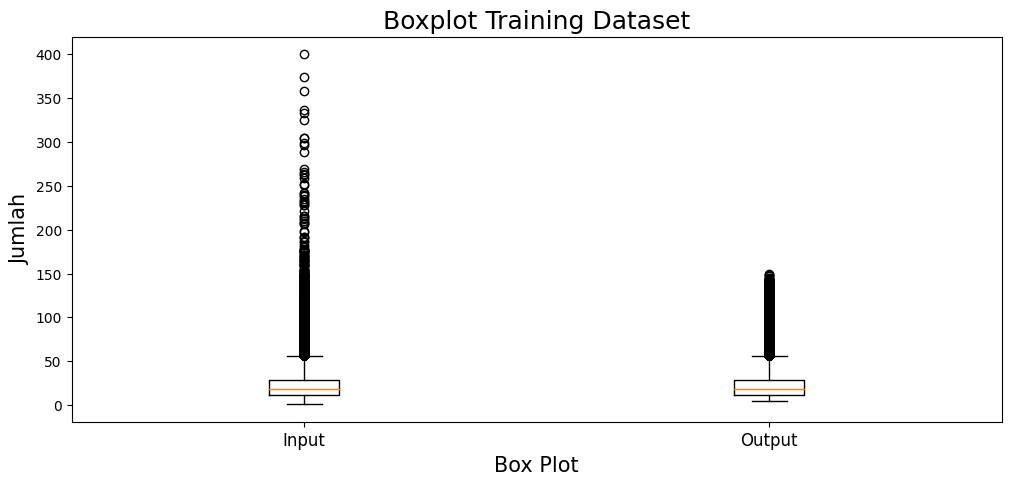

In [21]:
# Display boxplot train dataset
box_plot(df_train, "Boxplot Training Dataset")

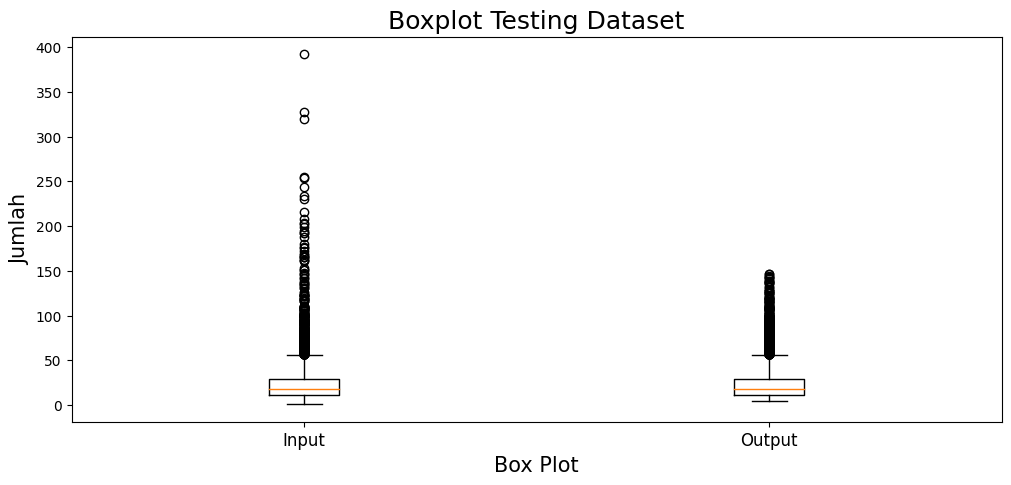

In [22]:
# Display boxplot test dataset
box_plot(df_test, "Boxplot Testing Dataset")

In [23]:
# Save data
!cp -r {COLAB_BASE_PATH + BOXPLOT_TRAIN + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + BOXPLOT_TEST + PNG} {DRIVE_TARGET_PATH}

Next I will check the dataset information.

In [24]:
# Display train dataset
df_train.head()

,input,output,length_input,length_output
0,"Bitcoin is for $7,094 this morning, which CoinDesk says.","Bitcoin goes for $7,094 this morning, according to CoinDesk.",9,9
1,The effect of widespread dud targets two face up attack position monsters on the field.,"1. The effect of ""widespread dud"" targets two face up attack position monsters on the field.",15,16
2,"tax on sales of stores for non residents are set at 21% for 2014 and 20% in 2015 payable on sales tentatively earned from the difference of the property value some time of purchase (price differences according to working time) and theyear to which sale couples (sales costs), based on the approved annual on the base approved by law).","Capital Gains tax on the sale of properties for non-residents is set at 21% for 2014 and 20% in 2015 payable on profits earned on the difference of the property value between the year of purchase (purchase price plus costs) and the year of sale (sales price minus costs), based on the approved annual percentage increase on the base value approved by law.",59,63
3,Much many brands and sellers still in the market.,Many brands and sellers still in the market.,9,8
4,this is is the latest Maintenance release of Samba 3.6,This is is the latest maintenance release of Samba 3.6.,10,10


In [25]:
# Display test dataset
df_test.head()

,input,output,length_input,length_output
0,Organizational mission of Kiss The Ground is inspire global participation in the restoration of our soil precious goods.,The organizational mission of Kiss the Ground is to inspire global participation in the restoration of our precious soils.,18,19
1,"Tap The Thumbnail Bellow to See Related Gallery of Elegant Window Treatments Elegant Window Treatment ideas design For Elegant Window Treatments decorator ""","Tap The Thumbnail Bellow to See Related Gallery of ""Elegant Window Treatments Elegant Window Treatment Ideas Design For Elegant Window Treatments Decor""",23,22
2,"when I relax that’s when I shake or jolt to me, like the more I relax the more I do if I focus my mind on anything it does’t happened much.","if I relax that’s when I shake or jolt, like the more I relax the more I do if I focus my mind on something it don’t happen much.",31,29
3,"Our neighbor Jay-dub (nickname courtesy of me since he remarked last week that all my kids have numerous nickname and only ever call him's Jake) he can claim ownership of our flock since the kids gives him a chick of them, Patty (aka Kevin).","Our neighbor Jay-dub (nickname courtesy me since he remarked last week that all my kids have numerous nicknames and we only ever call him Jake). He can claim ownership of our flock since the kids gave him a chick of his own, Patty (aka Kevin).",44,45
4,"Kummrow Automotive is now a Official Distributor Dinan offers a line of high performance products, upgrades and services to enhance your BMW or MINI.","Kummrow Automotive is now an official Dinan Distributor offering a line of high performance products, upgrades and services to enhance your BMW or MINI.",24,24


In [26]:
# Display train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   input          100000 non-null  object
 1   output         100000 non-null  object
 2   length_input   100000 non-null  int64 
 3   length_output  100000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [27]:
# Display test dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   input          25000 non-null  object
 1   output         25000 non-null  object
 2   length_input   25000 non-null  int64 
 3   length_output  25000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 781.4+ KB


In [28]:
# Check isnull in train dataset
df_train.isnull().any()

input            False
output           False
length_input     False
length_output    False
dtype: bool

In [29]:
# Check isnull in test dataset
df_test.isnull().any()

input            False
output           False
length_input     False
length_output    False
dtype: bool

Last before push the dataset to hub, I mush convert from dataframe to dataset dict.

In [30]:
# Pandas to dataset
dataset_train = Dataset.from_pandas(df_train)
dataset_test = Dataset.from_pandas(df_test)

In [31]:
# To dataset dict
dataset = DatasetDict({TRAIN_DATASET:dataset_train, TEST_DATASET:dataset_test})

In [32]:
# Display dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'length_input', 'length_output'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['input', 'output', 'length_input', 'length_output'],
        num_rows: 25000
    })
})

<div class="markdown-google-sans">

## **Push Dataset to Hub 🥳**
</div>

After doing the whole process I'm going to save the dataset to [Hugging Face Dataset Hub](https://huggingface.co/datasets). To save the dataset in [Hugging Face Dataset Hub](https://huggingface.co/datasets), first I must login into Hugging Face Hub. To login into Hugging Face Hub I just call the [`notebook_login`](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/login#huggingface_hub.notebook_login) function and copy the token into this notebook.

In [33]:
# Hugging Face login
notebook_login()

After successful login into Hugging Face Hub, last I can save the dataset to [Hugging Face Dataset Hub](https://huggingface.co/datasets) just call the [`push_to_hub`](https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#pushtohub) in dataset and set dataset name and private value.

In [34]:
# Push dataset to hub
dataset.push_to_hub(TARGET_HUGGING_FACE_DATASET_NAME, private=PRIVATE)

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/100 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Now dataset is ready to use for fine tune some task. Now this dataset is available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).